In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\harsh\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\harsh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
ds = pd.read_csv('insurance_data.txt', sep=",")

In [3]:
ds

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


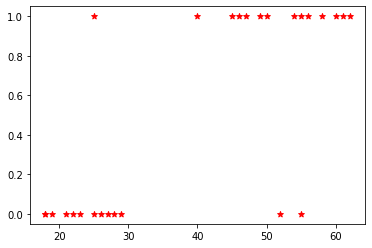

In [4]:
%matplotlib inline
plt.scatter(ds['age'], ds['bought_insurance'], color='red', marker='*');

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
X = ds.age
y = ds.bought_insurance
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LogisticRegression()

In [8]:
train_x = train_x.values.reshape((-1, 1))
test_x = test_x.values.reshape((-1, 1))
train_y = train_y.values.reshape((-1, 1))
test_y = test_y.values.reshape((-1, 1))

In [9]:
model.fit(train_x, train_y)

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [10]:
model.coef_

array([[0.11307718]])

In [11]:
model.intercept_

array([-4.15312723])

In [12]:
y_predict = model.predict(test_x)

In [13]:
y_predict

array([1, 0, 1, 0, 0, 0], dtype=int64)

In [14]:
test_y

array([[1],
       [0],
       [1],
       [0],
       [0],
       [0]], dtype=int64)

In [15]:
model.score(test_x, test_y)

1.0

In [16]:
model.predict_proba(test_x)

array([[0.05428681, 0.94571319],
       [0.70555426, 0.29444574],
       [0.06039343, 0.93960657],
       [0.77085061, 0.22914939],
       [0.84096546, 0.15903454],
       [0.72848825, 0.27151175]])

In [17]:
mse = mean_squared_error(test_y, y_predict)
print("MSE:", mse)

r2_score = r2_score(test_y, y_predict)
print("r2_score:", r2_score)

MSE: 0.0
r2_score: 1.0


In [18]:
X.shape

(27,)

In [19]:
X_ = X
X_ = X_.values.reshape((-1, 1))

In [20]:
y_whole_predict = model.predict(X_)

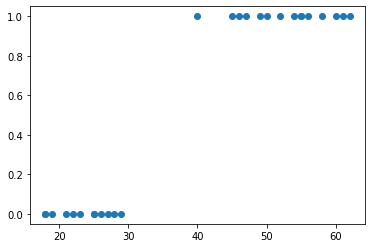

In [21]:
plt.scatter(X_, y_whole_predict)

In [22]:
mean_squared_error(y, y_whole_predict)

0.1111111111111111

In [25]:
model.score(X_, y)

0.8888888888888888